<a href="https://colab.research.google.com/github/RexcyPutra/Hello-Project---Rexcy-Putra-A/blob/main/2_Visualization_Tools_1_assignment_1301201589.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment
## Rexcy Putra Adrianto - 1301201589

First we need to import necessary library that we will use for today's data

In [14]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

We need to make sure the data is readable

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

To make sure that the data is like what we need , we have to drop unnecessary columns

In [3]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Rename columns title so we could read the data better


In [4]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [5]:
df_can['Total'] = df_can.sum(axis=1)

<ipython-input-5-8cd345a76c6e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Now we need to acquire the data set for China and India, and display the dataframe.

In [15]:
### type your answer here
df_can.columns = list(map(str, df_can.columns))
all(isinstance(column, str) for column in df_can.columns)
df_can.set_index('Country', inplace=True)
years = list(map(str, range(1980, 2014)))

dataframe = df_can.loc[['China', 'India'], years]
dataframe.head()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

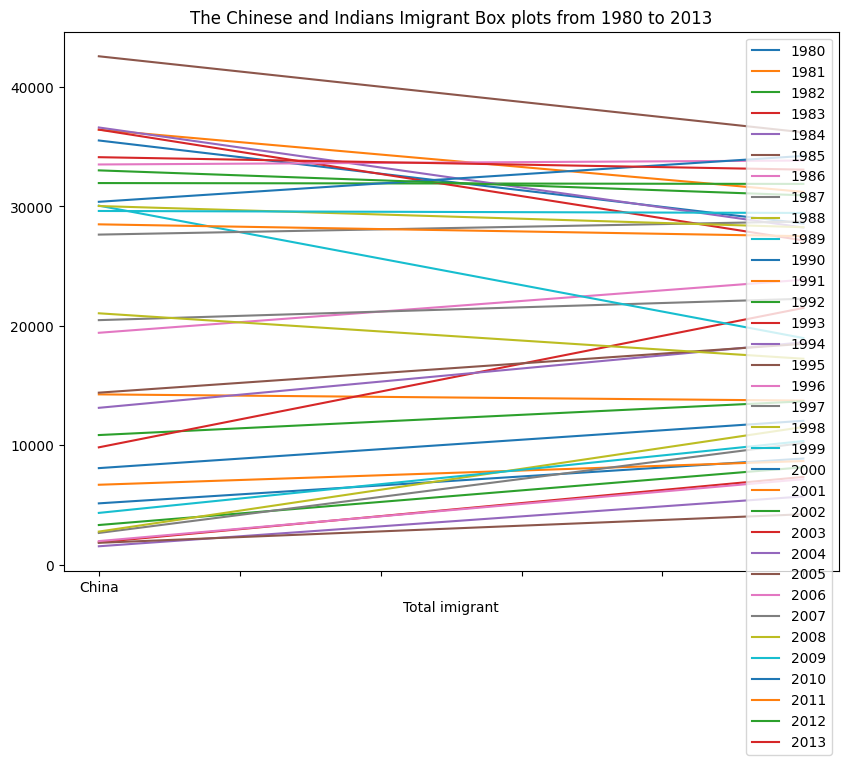

In [20]:
### type your answer here
import matplotlib.pyplot as plt #useful creating static, animated, and interactive visualizations in Python.

dataframe.plot(kind='line', figsize=(10, 7))

plt.title('The Chinese and Indians Imigrant Box plots from 1980 to 2013')
plt.xlabel('Total of imigrant')

### Move the legend to the upper right corner
plt.legend(loc='upper right')

plt.show()

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

Step 1: Get the data set for top 5 countries

In [21]:
### type your answer here
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top4 = df_can.head(4)
df_top4 = df_top4[years].transpose()

Step 2: Plot graph

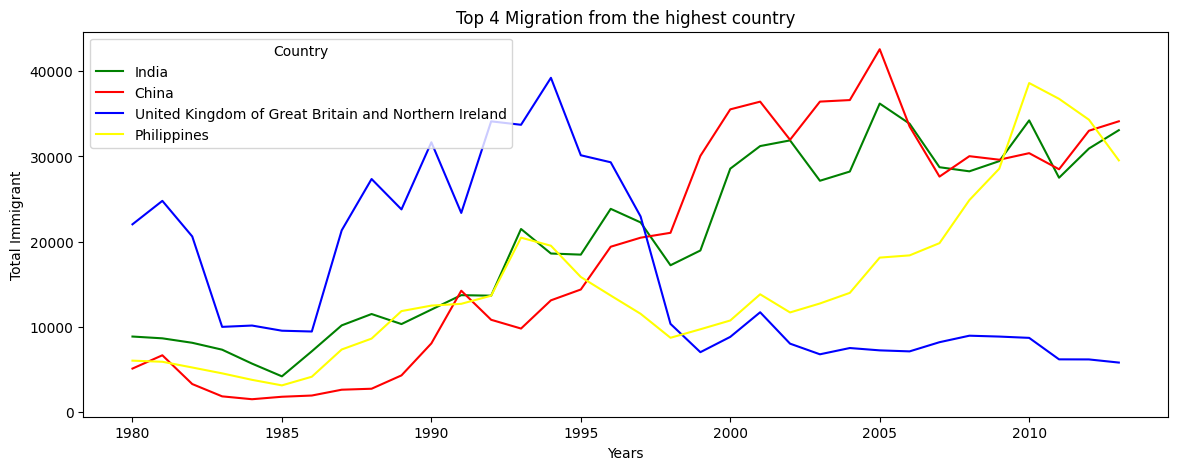

In [25]:
### type your answer here
### We want to make sure that the color represent the country that they served
df_top4.plot(kind='line', figsize=(14, 5), color=['green', 'red', 'blue', 'yellow'])

plt.title('Top 4 Migration from the highest country')
plt.ylabel('Total of Immigrant')
plt.xlabel('Years')
plt.show()

**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

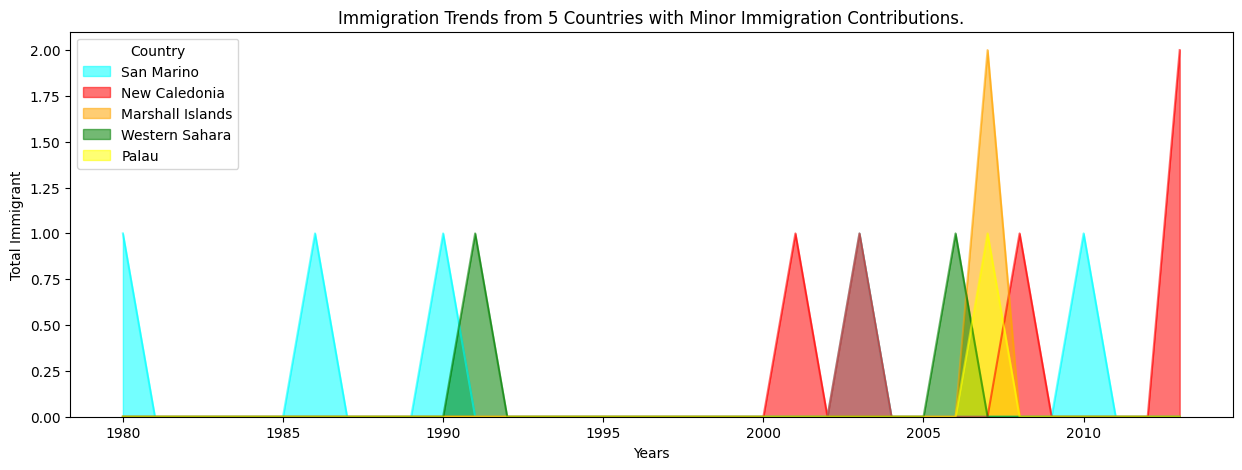

In [30]:
### type your answer here
df_five = df_can.tail(5)
df_five = df_five[years].transpose()
df_five.index = df_five.index.map(int)

### Define a list of colors for each country
### We want to make sure that the color represent the country that they served
colors = ['cyan', 'red', 'orange', 'green', 'yellow']

### Plot the stacked area chart with custom colors
y = df_five.plot(kind='area', alpha=0.55, stacked=False, figsize=(15, 5), color=colors)

y.set_title('Immigration Trends from 5 Countries with Minor Immigration Contributions.')
y.set_ylabel('Total of Immigrant')
y.set_xlabel('Years')

plt.show()

**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

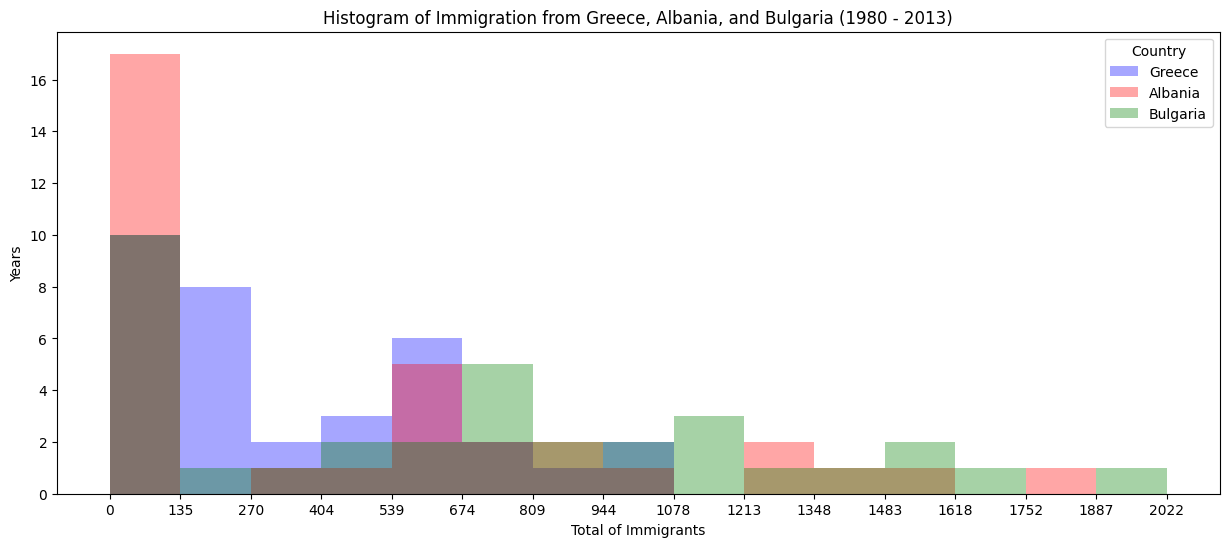

In [32]:
### type your answer here
from tkinter import * #to help create Graphical User interfaces
df_q4 = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()

### Get x-tick values
count, bin_edges = np.histogram(df_q4, 15)

###We want to make sure that the color represent the country that they served
colors = ['blue', 'red', 'green']

### Create the histogram
df_q4.plot(
    kind='hist',
    figsize=(15, 6),
    bins=15,
    alpha=0.35,
    xticks=bin_edges,
    color=colors
)

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria (1980 - 2013)')
plt.ylabel('Years')
plt.xlabel('Total of Immigrants')

plt.show()




**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [33]:
### type your answer here
df_can.sort_values(by='Total', ascending=True, inplace=True)

###Top 15 countries
df_q5 = df_can['Total'].tail(15)

Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
<!--    3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface. -->

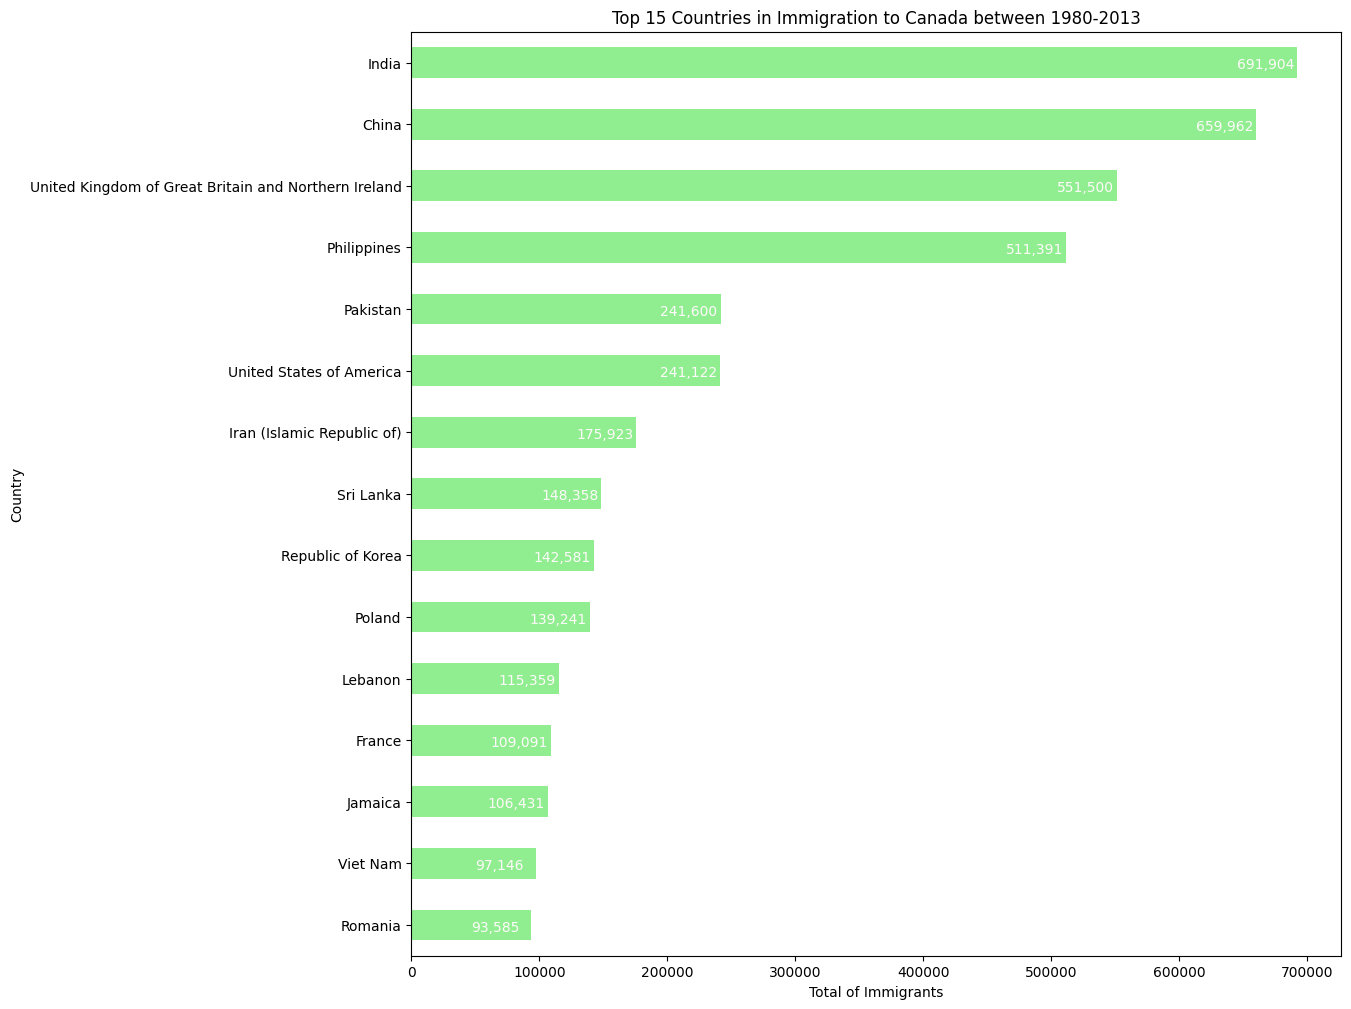

In [39]:
### type your answer here
df_q5.plot(kind='barh', figsize=(12, 12), color='lightgreen')
plt.xlabel('Total of Immigrants')
plt.title('Top 15 Countries in Immigration to Canada between 1980-2013')

# Values for each country
for index, value in enumerate(df_q5):
    label = format(int(value), ',')

    plt.annotate(label, xy=(value - 47000, index - 0.10), color='snow')

plt.show()

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).